In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = np.loadtxt('data.txt', skiprows=1)
x = data[:,0]
y = data[:,1]
y_std = data[:,2]

(Note: I took this least-squares solution from the linear regression example notebook that was provided in AST303 last fall.)


Let $\tilde{\theta}$ be the maximum likelihood estimate of the parameters $\theta = (a,b,c)$. The likelihood has a minimum at:
$$\tilde{\boldsymbol{\theta}} = \left[\mathbf{X}^\top \, \boldsymbol{\Sigma}^{-1} \, \mathbf{X}\right]^{-1} \, 
    \mathbf{X}^\top \, \boldsymbol{\Sigma}^{-1} \, \mathbf{y}$$
where $\mathbf{X}$ is a Vandermonde matrix based on $x$ and $\boldsymbol{\Sigma}$ is the data's covariance matrix. (Also, $C = \left[\mathbf{X}^\top \, \boldsymbol{\Sigma}^{-1} \, \mathbf{X}\right]^{-1}$ is the covariance matrix of the parameters.)

In [27]:
# fit y = a + bx + cx^2
X = np.vander(x, N=3, increasing=True)

cov = np.diag(y_std**2)
covInv = np.linalg.inv(cov) # inverse of the covariance matrix

# parameter covariance matrix
theta_cov = np.linalg.inv(X.T @ covInv @ X)
# MLE
theta_best = theta_cov @ (X.T @ covInv @ y)

a, b, c = theta_best[0], theta_best[1], theta_best[2]

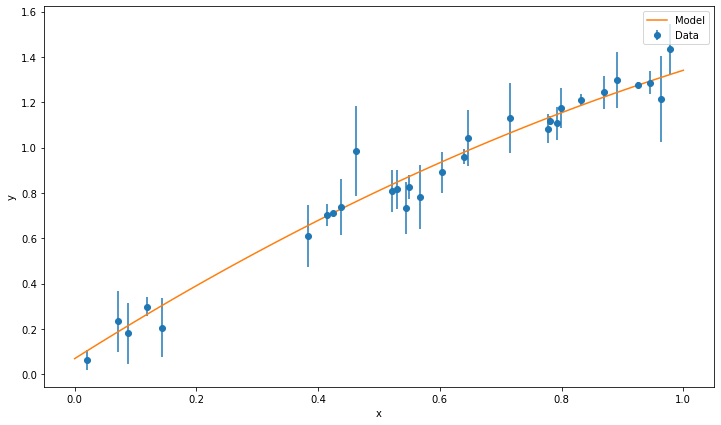

In [31]:
fig = plt.figure(figsize=(12,7))

# data
plt.errorbar(x, y, yerr=y_std, marker='o', linestyle='None', label='Data')

# quadratic model
xPoints = np.linspace(0, 1, num=100)
yPoints = a + b * xPoints + c * xPoints**2
plt.plot(xPoints, yPoints, label='Model')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()